<a href="https://colab.research.google.com/github/Pongpang-2102/Text_Mining_and_Sentiment_Analytics_KDAI_projects/blob/main/KDAI_TMSA_Midterm_Project_(12_Sep_23)_%E0%B8%82%E0%B9%89%E0%B8%AD_2_1_W2V_GenSim_Puriwat_65056071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Midterm Project วิชา Text Mining and Sentiment Analytics (1/2566)

## Student info

- Name : Puriwat Sangrawee ( นายภูริวัฒน์ แสงระวี)
- Student ID : 65056071
- สาขาวิชา : วิทยาการข้อมูลและการวิเคราะห์ (ชั้นปีที่ 2 )

# โจทย์ปัญหา

## ข้อ 2 : Text Analytics (25 คะแนน)

- ให้นักศึกษานำความคิดเห็นที่ได้รับใน Folder ของแต่ละคนไปดำเนินการดังนี้

### 2.1 Word Embedding (Word2vec)

**คำชี้แจง**

- ทำ Word Embedding (word2vec) ด้วยวิธีใดก็ได้ จากนั้นนำไป plot ใน https://projector.tensorflow.org/ และอธิบายสิ่งที่พบ

**ลำดับการทำงาน**

- ติดตั้ง PyThaiNLP & Mount Google Drive

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 88.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Import package ที่จำเป็น

In [ ]:
import pandas as pd
import re

from pythainlp.tokenize import word_tokenize
import numpy as np

from gensim.models import Word2Vec

- อ่านไฟล์ที่จะใช้ทดสอบตัวตัดคำ

In [ ]:
# read text file : femcomment.txt

file_name = '/content/drive/MyDrive/# KDAI_TextMining/Exam 4-10 Sep 23/Problem02/femcomment.txt'
file_name

'/content/drive/MyDrive/# KDAI_TextMining/Exam 4-10 Sep 23/Problem02/femcomment.txt'

- แปลงข้อความเป็น Data Frame

In [ ]:
df = pd.read_csv(file_name,encoding ='utf-8' ,names = ['comment'] )

- นับจำนวนประโยคที่มีมาให้

In [ ]:
# to count number of comments in file : femcomment.txt
print(f"number of cooments : {df.shape[0]}")
print(f"number of column: {df.shape[1]}")

number of cooments : 500
number of column: 1


- ลองดูตัวอย่าง 5 แถวแรก และ 5 แถวสุดท้าย

In [ ]:
df.head()

,comment
0,เฟมทวิตคือคนที่ลากทุกอย่างไปเป็นเรื่อง ความไม่...
1,จะเฟมินิสต์หรือเฟมทวิต ก็ไม่เคยเป็นคำที่ได้รับ...
2,และถ้าเทียบการพยายามดิสเครดิต ก็เทียบได้กับคำว...
3,เฟมทวิตดูโง่เพราะคนอย่างนี้แหละค่ะ
4,เฟมทวิตไม่น่าจะอยากคุยกับคนแบบมึงนะ


In [ ]:
df.tail()

,comment
495,หากให้สิทธิที่เท่าเทียมกับพวกเขา พวกเขาก็จะมีค...
496,แต่ทุกคนต้องมีความเท่าเทียมกันในฐานะมนุษย์ มีส...
497,และการศึกษาก็ควรจะเป็นสิ่งที่ทำให้เข้าถึงง่ายใ...
498,แต่สิ่งที่ควรทำคือ ควรจะผลักดันให้เกิดความเท่า...
499,เพื่อให้ทุกโอกาสเข้าไปถึงคนทุกชนชั้น คนทุกเพศ ...


- ลองดูตัวอย่างประโยคที่  index ที่ 50-60

In [ ]:
df.loc[50:60]

,comment
50,ผู้ชายมีกิ๊ก มีชู้ ดูเป็นเรื่องปรกติ บางคนบอกผ...
51,ผู้หญิงด่าผู้ชาย ตบผู้ชายได้ครับ แต่ผู้ชายห้าม...
52,ก็ใช่สิเพราะคนดักดานมันจะไปมองเห็นมูฟเม้นได้ยังไง
53,ถ้าไม่เข้าใจ feminist ก็ไปหาความรู้นะ ไม่ใช่ว่...
54,Feminist แล้วงายยยย อีควัยยย อีพวก ผช. พวกนี้แ...
55,เอาง่ายๆแหละ มจ นางมองเฟมทวิตในแง่ลบ ละลดทอน f...
56,ถ้าผู้ชายเหมือนผู้หญิง บอก ยูนิเซ็ก แต่ผู้หญิง...
57,ไม่ชอบเฟมินิสต์ก็บอกไม่ชอบเฟมินิสต์ ไม่สนับสนุ...
58,ผู้ชายเกาหลีเขาเต็มไหมคะบอบบางอะไรเบอร์นี้ งงมาก
59,เปราะบางเหลือเกินผู้ชายเกาหลี... นิดๆหน่อยๆ ก็...


- ดึงข้อความออกจาก dataframe

In [ ]:
comments = df.comment.values
comments.shape

(500,)

In [ ]:
comments[200:205]

array(['ผู้ชายเกาหลีบางคนบ้งในบ้งในบ้ง เป็นไรกับคำว่า feminist นัก',
       'ไม่พอใจและเรียกร้องให้คืนเหรียญ ',
       'ปิตาธิปไตย หรือระบบสังคมที่ชายเป็นใหญ่ ',
       'และในปัจจุบันผู้หญิงชาวเกาหลีที่ถูกกดทับมาเป็นเวลานานเริ่มออกมาต่อสู้ ',
       'เรียกร้องเพื่อให้ได้มาซึ่งสิทธิและเสรีภาพที่พวกเธอสมควรจะได้รับ '],
      dtype=object)

#### 01 - ตัวตัดคำ

- ทดลองตัดคำด้วย `word_tokenize` แบบ `gensim`

In [ ]:
tcomments= []
for cm in comments:
    tokens = word_tokenize(cm.strip())
    tcomments.append(tokens)

tcomments[200:205]

[['ผู้ชาย',
  'เกาหลี',
  'บางคน',
  'บ้ง',
  'ใน',
  'บ้ง',
  'ใน',
  'บ้ง',
  ' ',
  'เป็นไร',
  'กับ',
  'คำ',
  'ว่า',
  ' ',
  'feminist',
  ' ',
  'นัก'],
 ['ไม่', 'พอใจ', 'และ', 'เรียกร้อง', 'ให้', 'คืน', 'เหรียญ'],
 ['ปิตาธิปไตย', ' ', 'หรือ', 'ระบบ', 'สังคม', 'ที่', 'ชาย', 'เป็นใหญ่'],
 ['และ',
  'ใน',
  'ปัจจุบัน',
  'ผู้หญิง',
  'ชาว',
  'เกาหลี',
  'ที่',
  'ถูก',
  'กด',
  'ทับ',
  'มา',
  'เป็นเวลา',
  'นาน',
  'เริ่ม',
  'ออกมา',
  'ต่อสู้'],
 ['เรียกร้อง',
  'เพื่อให้',
  'ได้มา',
  'ซึ่ง',
  'สิทธิ',
  'และ',
  'เสรีภาพ',
  'ที่',
  'พวก',
  'เธอ',
  'สม',
  'ควรจะ',
  'ได้รับ']]

#### 02 - Before Training

- กำหนด dimension

In [ ]:
dimension = 128

- สร้าง Word2Vec โดยกำหนดพารามิเตอร์ ต่างๆ ที่ต้องการ

In [ ]:
w2v_model = Word2Vec(tcomments, min_count=1, vector_size=dimension, workers=6, sg=1, epochs=200)

#### 03 - After Training

- ดูข้อมูลของ Model

In [ ]:
print(w2v_model)

Word2Vec<vocab=1697, vector_size=128, alpha=0.025>


- save model

In [ ]:
w2v_model.save('w2vG_femtweet_model.bin')

- load model

In [ ]:
new_model = Word2Vec.load('w2vG_femtweet_model.bin')

- ลองดู Word Similarity

In [ ]:
new_model.wv.similarity('เท่าเทียม', 'ชาย')

0.14241591

In [ ]:
new_model.wv.similarity('เฟม', 'ขยะ')

0.30348262

- ลองดูคำที่มีค่า Similarity สูงสุด 20 อันดับ

In [ ]:
new_model.wv.most_similar(positive=['เฟม'], topn=20)

[('ต', 0.812009871006012),
 ('ทวิ', 0.7985297441482544),
 ('ฉิบหาย', 0.5456320643424988),
 ('สมเพช', 0.5441465973854065),
 ('เกิ๊น', 0.5396022796630859),
 ('เลอะเทอะ', 0.5225661993026733),
 ('เป็นไง', 0.5213234424591064),
 ('ล่ะ', 0.5093564987182617),
 ('อ๋า', 0.4987562596797943),
 ('ผล', 0.49760109186172485),
 ('เดิน', 0.4870051443576813),
 ('าาา', 0.4787982106208801),
 ('นำหน้า', 0.47452524304389954),
 ('ขยะสังคม', 0.4641033113002777),
 ('นิสต์', 0.4562344253063202),
 ('ตัวจริง', 0.44979411363601685),
 ('หอก', 0.4447316825389862),
 ('เบื่อ', 0.44434306025505066),
 ('หาง', 0.440674364566803),
 ('งับ', 0.43939098715782166)]

- ดึงคำทั้งหมดจาก Model ออกมา

In [ ]:
#words = list(new_model.wv.vocab)
words = list(new_model.wv.index_to_key)

- ลองดูตัวอย่าง 20 คำแรก

In [ ]:
words[:20]

[' ',
 'ทางเพศ',
 'ที่',
 'ไม่',
 'ทวิ',
 'ต',
 'เฟม',
 'ความเท่าเทียม',
 'ก็',
 'เป็น',
 'และ',
 'มี',
 'จะ',
 'ใน',
 'ได้',
 'ว่า',
 'ของ',
 'ให้',
 'เพศ',
 'เรื่อง']

- ดึง vector ของคำจาก Model ออกมา

In [ ]:
vectors = list(new_model.wv.vectors)

In [ ]:
vectors

[array([-3.28227520e-01,  2.67295748e-01,  6.72310829e-01,  2.03216583e-01,
        -1.37565091e-01,  1.19978806e-03, -1.10435806e-01, -1.01301461e-01,
         2.27492616e-01,  6.15309216e-02,  3.43234748e-01, -3.67194980e-01,
         1.65583283e-01,  1.41053312e-02, -9.28847045e-02,  9.46955010e-02,
        -2.96521205e-02,  2.25007311e-01, -8.09838399e-02, -3.58232796e-01,
         6.25350177e-01, -2.99875537e-04, -2.61648118e-01, -3.60832214e-01,
         3.20360690e-01, -1.84064895e-01,  1.23010367e-01, -8.09658542e-02,
         1.63069591e-01,  2.71956064e-02, -3.11457366e-01, -8.95439908e-02,
         3.53904784e-01, -4.90566254e-01, -3.29510905e-02, -2.40159303e-01,
        -2.05226451e-01, -1.73893243e-01, -1.64298981e-01,  3.83981206e-02,
        -7.41043985e-02, -2.88242280e-01, -6.67875856e-02, -3.88105124e-01,
        -4.59886342e-02, -5.01033813e-02, -3.35031956e-01,  4.99281526e-01,
         2.75877148e-01,  2.79990703e-01,  1.72829747e-01,  6.05914474e-01,
         2.6

- ทำการสร้างไฟล์ `w2v.tsv` และ `label.tsv` เพื่อใช้ใน step ถัดไป

In [ ]:
import csv

3# ลงท้ายด้วย G บ่งบอกว่ามาจาก Gensim
with open('w2vG_femtweet.tsv', 'w') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for v in vectors:
        tsv_writer.writerow(v)

with open('labelG_femtweet.tsv', 'w') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for word in words:
        tsv_writer.writerow([word])

- หลังจากเรารันโค้ดด้านบน ไฟล์ `label.tsv` , `w2v.h5` , `w2v.tsv` และ `w2v_history_model` จะถูก generate ขึ้นมา ดังภาพ

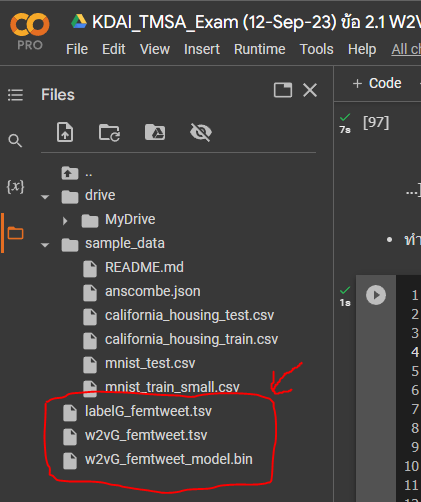

- ให้เราทำการ save ไฟล์ดังกล่าวมาไว้ที่เครื่อง  เพื่อจะนำไฟล์ดังกล่าวไปใช้งานในขั้นตอนถัดไป

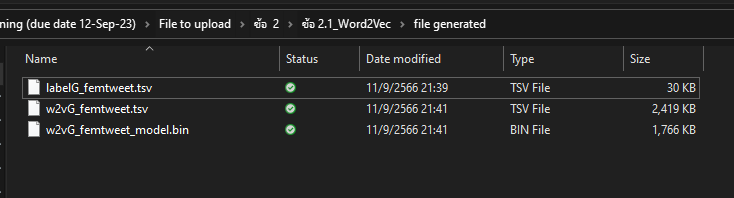

#### 04 - Projector Tensorflow

- ไปยัง https://projector.tensorflow.org กดที่ปุ่ม Load เพื่อ Load ไฟล์ w2v.tsv และ label.tsv

- ลองค้นหาคำว่า "เฟม"

จากการลองค้นคำว่า `เฟม`

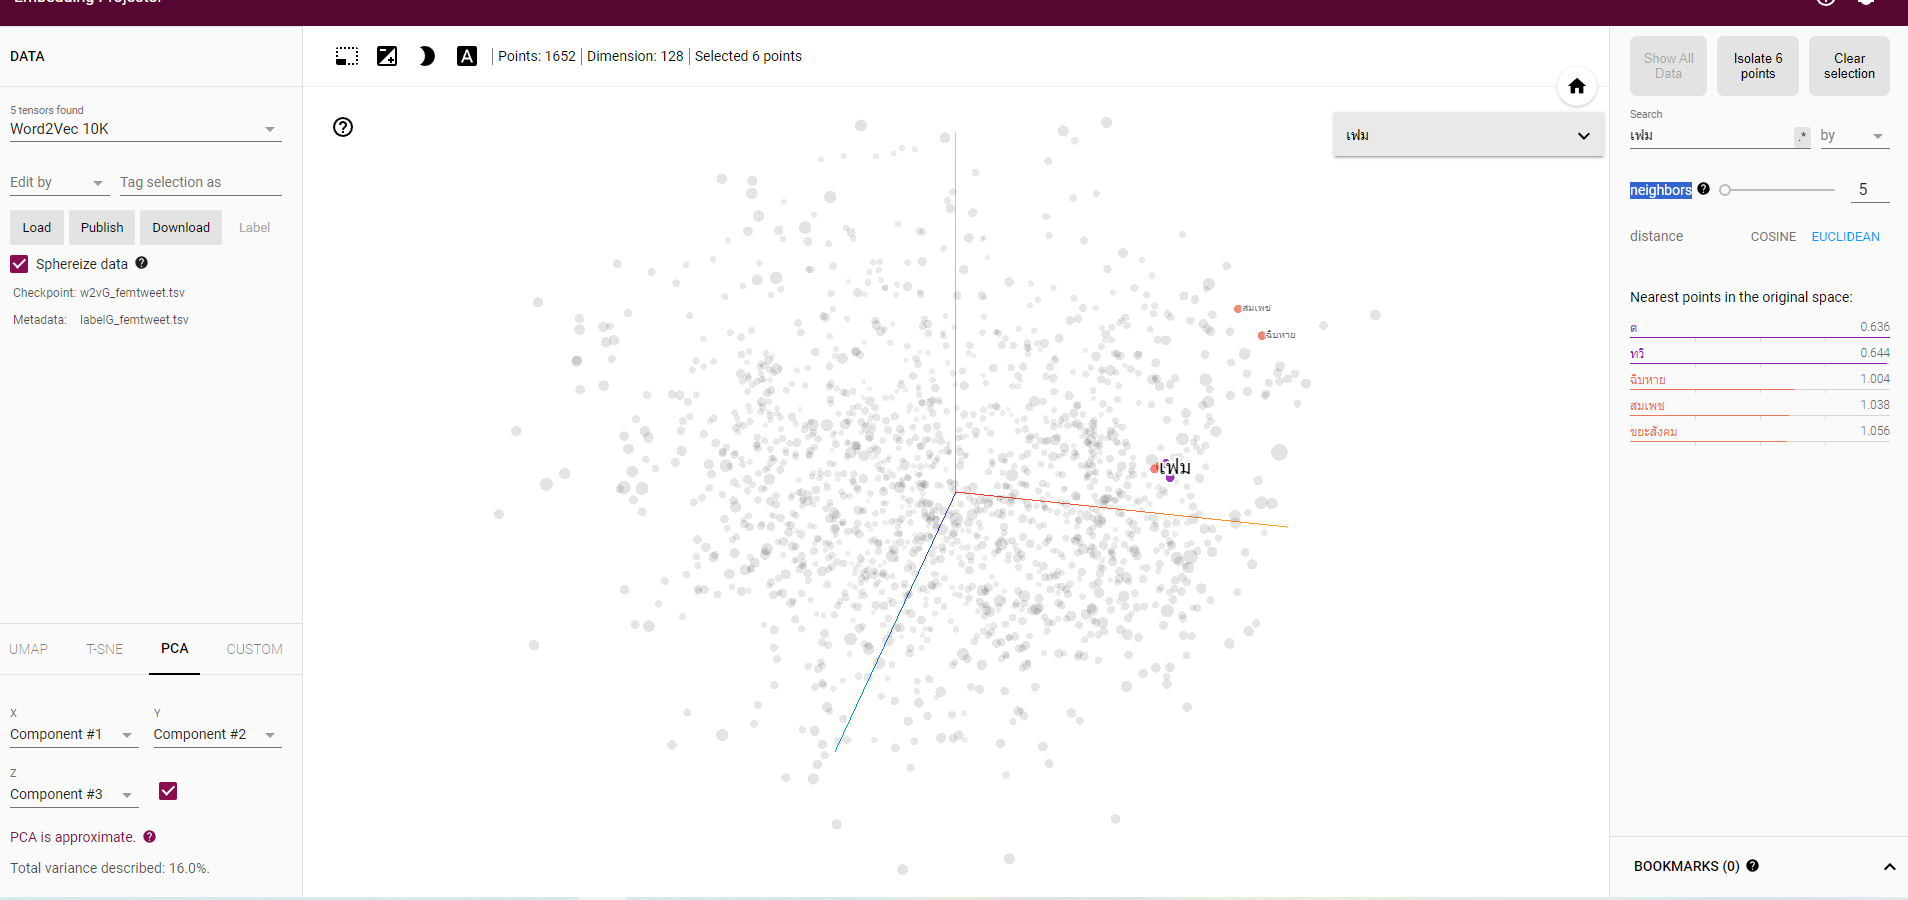

จากการลองค้นหาคำว่า `เฟม` (ด้วยการเลือก Visual แบบ PCA และกำหนด Nearest neighbor = 5 และเลือก Distance แบบ Euclidian) พบว่า เราจะได้คำที่ Algorithm (ของ GenSim ภายใต้ค่า hyperparameter ที่เราตั้งไว้ ) ทำการวัดผลเปรียบเทียบค่าเวกเตอร์ระหว่าง ตัวที่กำลังทำการค้นหา และคำอื่น ๆ อีก 5 คำ โดยวัดผลในรูประยะทางยูคลิเดียน โดยหากคำไหนระยะดังกล่าวน้อยที่สุด 5 อันดับแรก ก็จะถูกแสดงออกมา ซึ่งในที่นี้ ได้แก่ : `ต , ทวิ , ฉิบหาย , สมเพช , ขยะสังคม` (เรียงจากน้อยไปมาก)  ซึ่งก็อาจตีความต่อยอดไปได้อีกว่า `5 คำนี้ อยู่ในบริบทที่คล้ายคลึงกัน หรือมีอาจความหมายเป็นไปในทำนองเดียวกันจากมากไปน้อยได้ด้วยเช่นกัน`

หมายเหตุ :

- ไฟล์ colab นี้ผมเพิ่งสร้างขึ้นมาใหม่วันนี้นะครับ ซึ่งภายหลังจากที่ลอง gen file แล้วนำไฟล์ไปใส่ใน projector.tensorflow.org เพื่อดู similiarity แล้ว มันแจ้งว่า
`Number of tensors do not macth the number of lines in the metadata` จำนวนไฟล์มัน diff กันอยู่ประมาณ 2 ไฟล์ - ผมเลยขออนุญาตใช้ไฟล์ tsv ที่ gen จาก ไฟล์ที่่ปรับแก้มาจากแบบฝึกหัดในห้องแทนนะครับ เพราะ gen แล้วไม่มีปัญหาใดๆ ซึ่งผมได้แนบไฟล์นี้ส่งไปด้วยครับ `(ซึ่ง code เหมือนกันทุกประการ) `ก่อนหน้านี้ผมลองทำ deepcut มันก็ขึ้นมาลักษณะเดียวกันครับ

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------